# Key Methods in Data Analysis for Machine Learning: Outliers, Correlation Analysis, Boxplots & Distributions, and Feature Engineering.

# OUTLIER DETECTION

Outliers are extreme values that fall a long way outside of the other observations. The process of identifying outlierhas many names in data mining and 
machine learning outlier mining, outlier modeling and novality detection and anomaly detection.

There are 3 different ways to detect outliers:-

1. Using Box Plot
2. Using IQR (Inter Quartile Range)
3. Using Z score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

# Setting the global font size for all plot elements (titles, labels, etc.)
plt.rcParams['font.size']=13

sns.set_style('darkgrid')


warnings.filterwarnings('ignore')    # This can be used for removing any future warnings
%matplotlib inline

titanic_df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

In [2]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic_df.shape

(891, 15)

## USING BOXPLOT

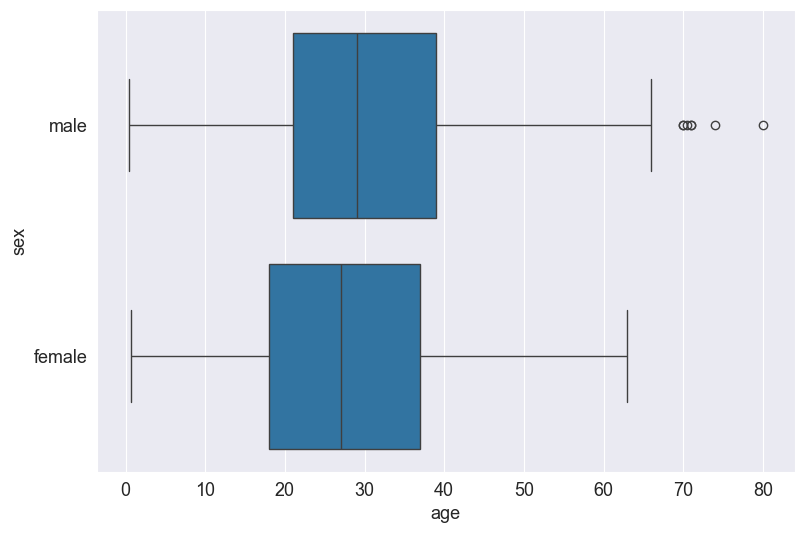

In [4]:
plt.figure(figsize=(9,6))
sns.boxplot(x = 'age',y='sex',  data=titanic_df);

In [5]:
import urllib.request
from PIL import Image

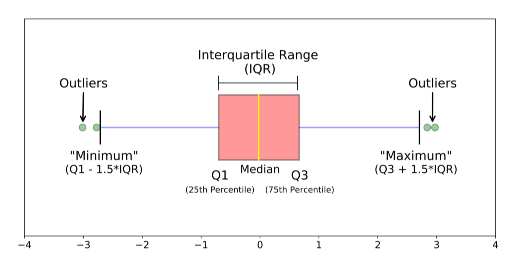

In [6]:
# Use direct image link
url = 'https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png'
headers = {'User-Agent': 'Mozilla/5.0'}
req = urllib.request.Request(url, headers=headers)

# Download image
with urllib.request.urlopen(req) as response, open('boxplot.png', 'wb') as f1:
    f1.write(response.read())

# Open and display
img = Image.open('boxplot.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
np.where(titanic_df.age > 67)

(array([ 96, 116, 493, 630, 672, 745, 851]),)

In [8]:
titanic_df.iloc[[96,116,493,630,672,745,851]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True


### Difference between .iloc[] and .loc[]:

##### iloc → Integer Location Based Indexing

* Access rows/columns by integer position (just like Python lists).

* It's purely positional — starting from 0.

##### loc → Label Based Indexing

* Access rows/columns by labels (index names or column names).

* Includes both the start and end labels (not exclusive like iloc).

| Feature        | `iloc`            | `loc`                 |
| -------------- | ----------------- | --------------------- |
| Based on       | Integer position  | Row/column labels     |
| Range includes | Excludes end      | Includes end          |
| Use case       | Positional access | Label-based filtering |

##### Common Mistake
If your index is something custom (like names or dates), loc[0] might fail because it’s looking for a label "0", not position.

### USING IQR (Inter Quartile Range)

In [9]:
percentile_25 = titanic_df.age.quantile(0.25)
percentile_75 = titanic_df.age.quantile(0.75)
iqr = percentile_75 - percentile_25
iqr

np.float64(17.875)

In [10]:
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr

In [11]:
upper_limit

np.float64(64.8125)

In [12]:
lower_limit

np.float64(-6.6875)

The values of the upper limit and the lower limit shows or tells us that any values beyond or below that is an outlier for me.

In [13]:
age_beyond_upper_limit = titanic_df.age >= upper_limit
age_beyond_upper_limit.sum()

np.int64(11)

In [14]:
age_below_lower_limit = titanic_df.age <= lower_limit
age_below_lower_limit.sum()

np.int64(0)

In [15]:
print("The locations where the outliers are located above the upper limit are: ")
np.where(age_beyond_upper_limit)

The locations where the outliers are located above the upper limit are: 


(array([ 33,  54,  96, 116, 280, 456, 493, 630, 672, 745, 851]),)

In [16]:
print("The locations where the outliers are bolow the lower limit are: ")
np.where(age_below_lower_limit)

The locations where the outliers are bolow the lower limit are: 


(array([], dtype=int64),)

Well, if you can see, there are n number of outliers below the lower limit or above upper limit. You might be wondering how to use that many indices to retrieve the respective rows of data — and the answer is right below.

In [17]:
outlier_upper_indeces = titanic_df.index[age_beyond_upper_limit].tolist()

What I did here was use the boolean values returned by **age_beyond_upper_limit**, convert them into indices using the **.index** method, 
and store them in **outlier_upper_indices** as a list. The same was done for the Outliers below the lower limit.

In [18]:
outlier_lower_indeces = titanic_df.index[age_below_lower_limit].tolist()

And then, with the help of the **.iloc[]** method, I printed the rows of data — just like we used to.

In [19]:
titanic_df.iloc[outlier_upper_indeces]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
280,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
456,0,1,male,65.0,0,0,26.5500,S,First,man,True,E,Southampton,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False


In [20]:
titanic_df.iloc[outlier_lower_indeces]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


### USING Z score

**Z score = (data_point-mean) / std. deviation**

##### Z-score (Standard Score) – Definition:

A Z-score tells you how many standard deviations a data point is away from the mean of a dataset.

##### In other words:
* If a Z-score is 0, the value is exactly at the mean.

* A Z-score of +2 means the value is 2 standard deviations above the mean.

* A Z-score of -1 means the value is 1 standard deviation below the mean.

In [21]:
std = np.std(titanic_df.age)   # Or you can just use aggregation like: titanic_df.age.std()
std

np.float64(14.516321150817316)

In [22]:
mean = np.mean(titanic_df.age)   # Or you can use titanic_df.age.mean()
mean

np.float64(29.69911764705882)

In [23]:
# Or you could just use:
std2 = titanic_df.age.describe()  # to get the mean and the std values for the respected column
std2

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

To find the Z score use:

In [24]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [25]:
z_score = [  (titanic_df.iloc[i, 3] - mean) / std for i in range(len(titanic_df))]   # This will find the zscore for each row of data
# Where i represents the row and 3 represents the location of the column 'age'

In [26]:
len(z_score)

891

In [27]:
for item in z_score:
    if item >= 3.0 or item <= -3.0:
        print(item)

3.4651260350566906
3.0517981720490455


### Understanding Z-Score with a Standard Deviation Diagram

The Z-score is a statistical measurement that tells us how far a data point is from the mean, in terms of standard deviations. 

The formula is:

                𝑍 = (𝑥 - 𝜇) / 𝜎
                
Where:

𝑥 = the individual data point

𝜇 = the mean of the dataset

𝜎 = the standard deviation of the dataset

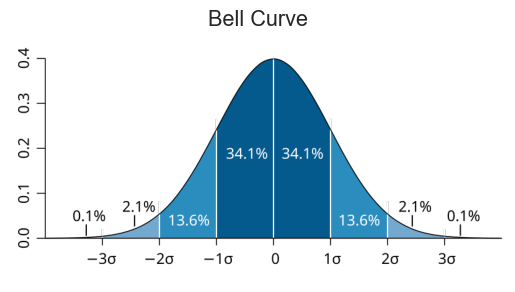

In [28]:
urll = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/800px-Standard_deviation_diagram.svg.png'

# Download the image
urllib.request.urlretrieve(urll, 'bell_curve.png')

# Open and display
img = Image.open('bell_curve.png')
plt.imshow(img)
plt.title('Bell Curve')
plt.axis('off')
plt.show()

From the image above:

* The center of the bell curve is the mean (μ).

* The curve is divided into sections based on standard deviations (σ) from the mean.

* Most values (about 68%) fall within ±1σ, around 95% within ±2σ, and about 99.7% within ±3σ.

The Z-score simply measures how far a particular value is from the mean:

* A Z-score of 0 means the value is exactly at the mean.

* A Z-score of +2 means the value is 2 standard deviations above the mean.

* A Z-score of -3 means it is 3 standard deviations below the mean.

### Why use Z-score?
Z-scores help us standardize data and detect outliers:

* Any value with ∣𝑍∣ > 3 is considered an outlier, as it falls outside the range where 99.7% of the data is expected to lie.

This makes the Z-score a powerful tool in outlier detection, normalization, and anomaly detection in statistics and machine learning.

---

# DISTRIBUTION PLOT

* UNIVARENT DISTRIBUTION
* HISTOGRAM - KDE - RUGPLOT

**DISTRIBUTION PLOT  = HISTOGRAM + KDE + RUGPLOT**

In [29]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [30]:
car_df = sns.load_dataset('car_crashes')

In [31]:
car_df.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [32]:
car_df.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

In [33]:
car_df.shape

(51, 8)

### car_crashes DataFrame Columns Explained

| Column Name          | Description                                                                                                                                                                                           |
| -------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **`total`**          | Total number of car crashes per **100 million vehicle miles driven**. This is the overall crash rate for each U.S. state. It serves as a **target variable** in some cases or a comparative baseline. |
| **`speeding`**       | Percentage of crashes where **speeding was a contributing factor**. This helps understand how speeding influences crash rates.                                                                        |
| **`alcohol`**        | Percentage of crashes where **alcohol was involved**. Useful for assessing DUI impact on accidents.                                                                                                   |
| **`not_distracted`** | Percentage of crashes **not caused by distractions** (like texting). Higher values here indicate **safer driving behavior** regarding attention.                                                      |
| **`no_previous`**    | Percentage of drivers involved in crashes who **had no previous accidents**. Indicates whether **inexperience or repeat behavior** is a factor.                                                       |
| **`ins_premium`**    | Average **car insurance premium** (in USD) for the state. May correlate with risk level, regulations, or claim frequency.                                                                             |
| **`ins_losses`**     | Average **loss per insured driver** (in USD). Reflects how much insurance companies lose (payouts) per driver — higher values can indicate more severe accidents.                                     |
| **`abbrev`**         | Two-letter **abbreviation for each U.S. state**. This is mostly for reference or plotting state-level data.                                                                                           |


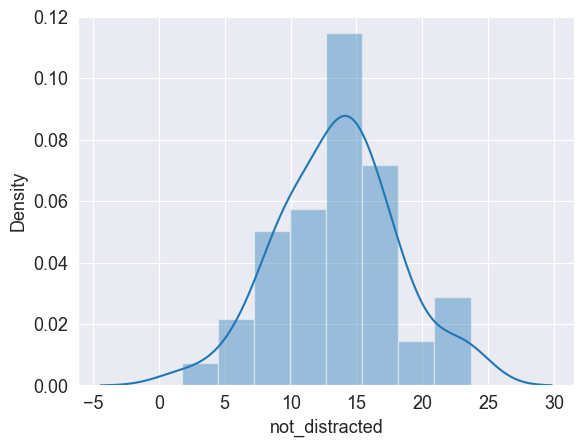

In [34]:
sns.distplot(car_df.not_distracted);

The bins represent the histogram, which shows the frequency distribution of the data. The line plot overlaid on the histogram is the KDE (Kernel Density Estimation) plot, which provides a smooth estimate of the probability density function of the variable.

If you wish to turn off the KDE plot, use:

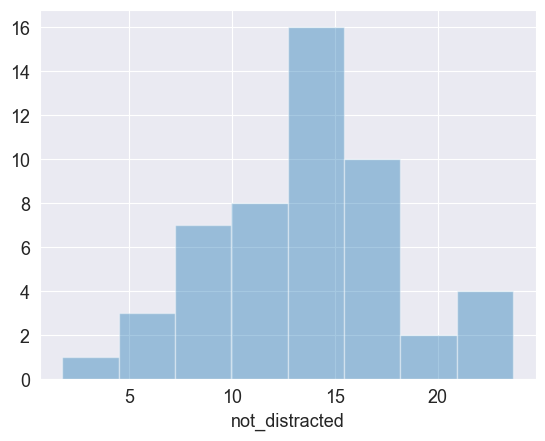

In [35]:
sns.distplot(car_df.not_distracted,kde = False);

#### Note: sns.distplot() is deprecated in recent versions of Seaborn. It's recommended to use sns.histplot() or sns.displot() instead.

In [36]:
car_df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


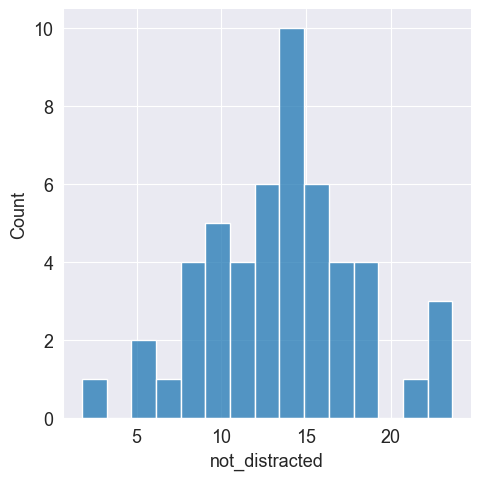

In [37]:
sns.displot(car_df.not_distracted, kde=False, bins=15);

You can also plot rugplot in the same plot by using **rug=True** as an argument in **sns.distplot(car_df.not_distracted, kde=False, bins=15);**

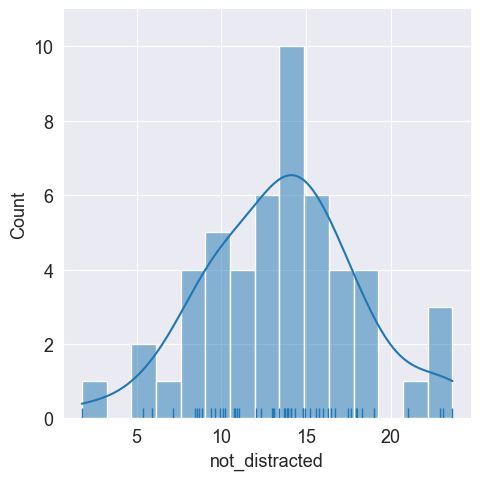

In [38]:
sns.displot(car_df.not_distracted, rug=True, kde=True, bins=15);

The small lines in the bottom of the plot is the rug plot.

If you wish to increase the height of the of the rug then use **rug_kws = {'height':0.15}** like:

***sns.distplot(car_df.not_distracted, rug=True, kde=True, rug_kws={'height':0.15}, bins=15);***

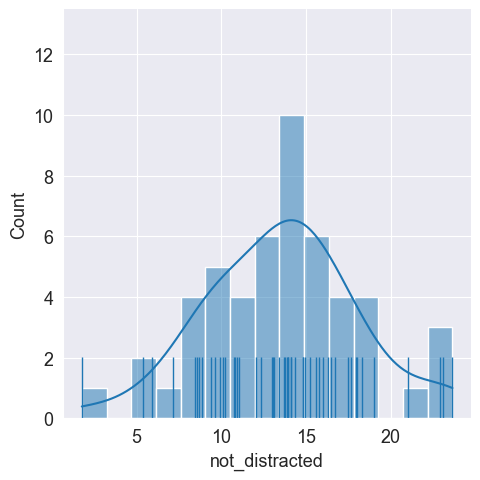

In [39]:
sns.displot(car_df.not_distracted, rug=True, kde=True, rug_kws={'height':0.15}, bins=15);    # Where kws stands for keywords

From the looks of the distplot, we can say that the highest density of not_distracted values lies between 13 and 15.

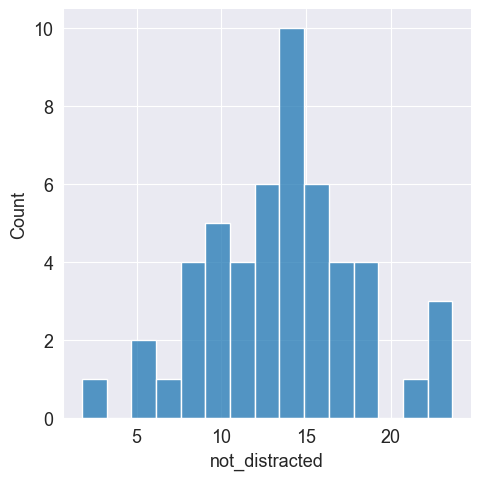

In [40]:
sns.displot(car_df.not_distracted, rug=False, kde=False, bins=15);

As we can see there is no gaps between the bar plots and if you wish to add gaps between them then use **hist_kws** as an argument like:

**sns.displot(car_df.not_distracted, hist_kws={'rwidth, bins=15);**

In [41]:
#sns.displot(car_df.not_distracted, rug=True, kde=True, rug_kws={'height':0.15}, hist_kws={'rwidth':0.8}, bins=15);   # Where rwidth represents the row width

 The error you're seeing is because sns.displot() does not accept **hist_kws** directly as a parameter like sns.histplot() does.

 You can use:

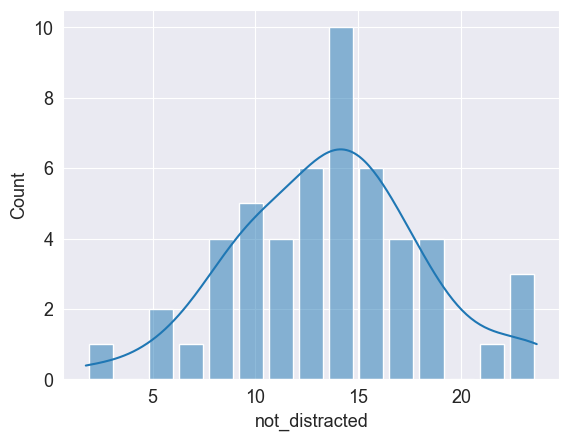

In [42]:
sns.histplot(
    data=car_df,
    x='not_distracted',
    bins=15,
    kde=True,
    element='bars',   # Ensure bars are used
    shrink=0.8         # Bar width (modern replacement for rwidth)
);

### Why use shrink=0.8?

* It shrinks the width of the bars to 80% of their default size.

* This avoids overlaps and gives a clearer visual, similar to rwidth=0.8 from older versions.

Now if you wish to plot rugplot in histplot then use:

    sns.rugplot(data=car_df, x='not_distracted', height=0.15)
    plt.show()

along with 

    sns.histplot(data=car_df, x='not_distracted', bins=15, kde=True, element='bars', shrink=0.8);

just like:

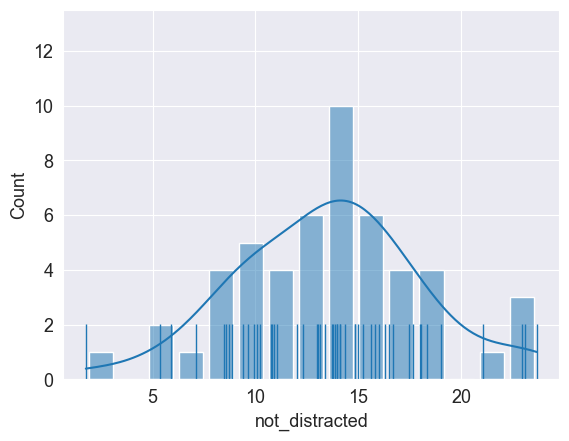

In [43]:
sns.histplot(data=car_df, x='not_distracted', bins=15, kde=True, element='bars', shrink=0.8);
sns.rugplot(data=car_df, x='not_distracted', height=0.15)
plt.show()

Or you can use the same arguments in **sns.distplot** like:


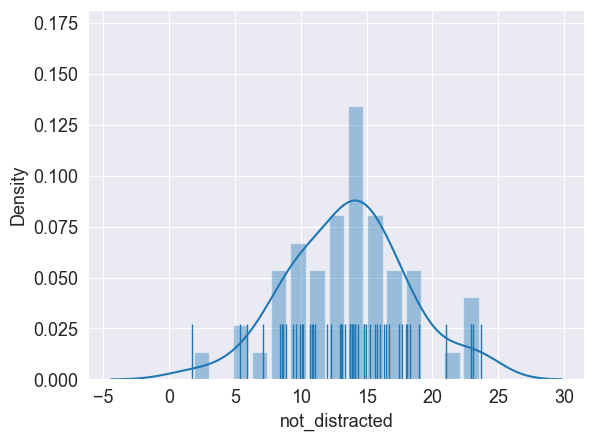

In [44]:
sns.distplot(car_df.not_distracted, rug=True, kde=True, rug_kws={'height':0.15}, hist_kws={'rwidth':0.8}, bins=15);   # Where rwidth represents the row width

If you wish to increase the opacity of the plot use **alpha** in 

    sns.histplot(data=car_df, x='not_distracted', bins=15, kde=True, element='bars', alpha=1, shrink=0.8);

as an argument like:

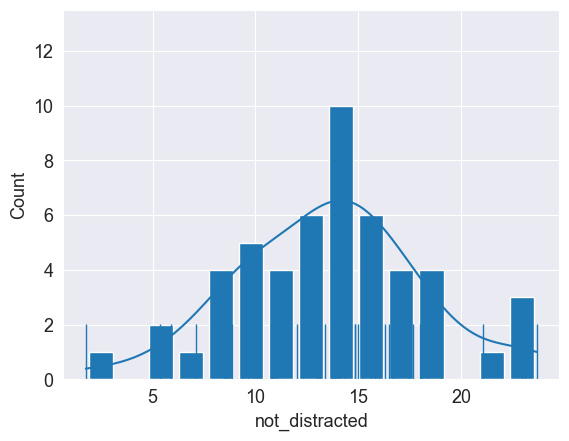

In [45]:
sns.histplot(data=car_df, x='not_distracted', bins=15, kde=True, element='bars', alpha=1, shrink=0.8);
sns.rugplot(data=car_df, x='not_distracted', height=0.15)
plt.show()

Or use:

sns.distplot(car_df.not_distracted, rug=True, kde=True, rug_kws={'height':0.15}, hist_kws={'rwidth':0.8, **'alpha':1**}, bins=15);

What if you don't want the inner distribution i.e you just need the outline ot the headline for each bar for that you can use **element** as an argument just like:

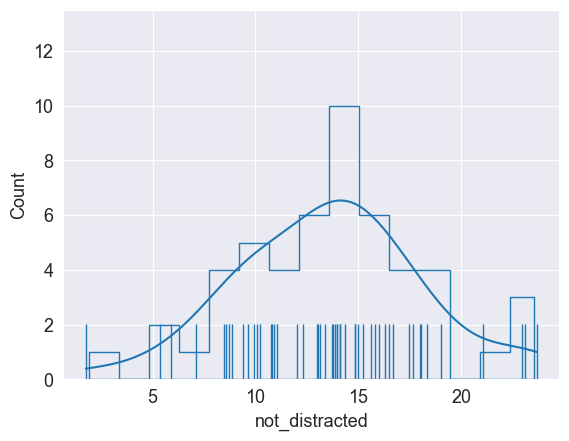

In [46]:
sns.histplot(
    data=car_df,
    x='not_distracted',
    bins=15,
    kde=True,
    element='step',      # Correct way to draw steps instead of solid bars
    alpha=0,             # Full opacity
    shrink=0.8           # Controls bar/step width
)

sns.rugplot(data=car_df, x='not_distracted', height=0.15)
plt.show()

Or you can just turn the opacity or the **alpha** down to 0 and after that you won't use it again see for yourself:

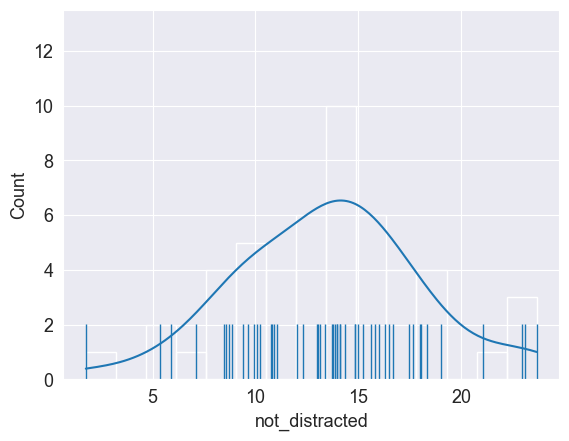

In [47]:
sns.histplot(data=car_df, x='not_distracted', bins=15, kde=True, element='bars', alpha=0);
sns.rugplot(data=car_df, x='not_distracted', height=0.15)
plt.show()

### Use Case Example:

##### If you use alpha=0:

    sns.histplot(data=car_df, x='not_distracted', bins=15, kde=True, alpha=0)

It hides the bars — but they still exist in the plot object. So if you overlay things or try interactivity later, they may still affect your plot layout or legends.

##### If you use element='step':

    sns.histplot(data=car_df, x='not_distracted', bins=15, kde=True, element='step')

It never draws the filled bars at all — it's cleaner, more efficient, and semantically accurate.

##### In short:

| Situation                                            | Use This         |
| ---------------------------------------------------- | ---------------- |
| You want invisible bars for some layering trick      | `alpha=0`        |
| You want **outline-only**, clean step-like histogram | `element='step'` |

---

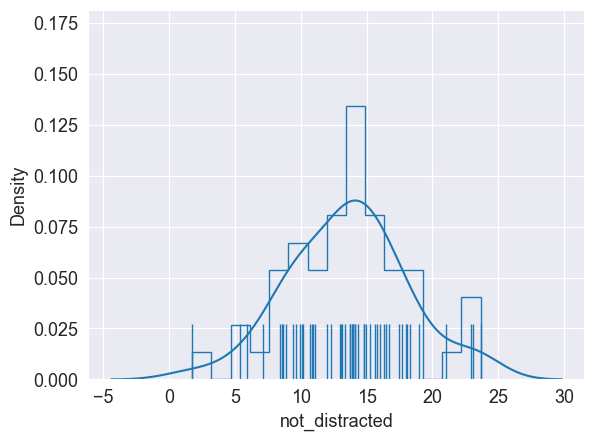

In [48]:
# Or you can just use:
sns.distplot(car_df.not_distracted, rug=True, kde=True, rug_kws={'height':0.15}, hist_kws={'alpha':1, 'histtype':'step'}, bins=15);

Now if you wish to make the line more thicker then use **lw** i.e line width and this will change the line width of the bar.

But if you want to increase the line width of the kde then use **line_kws** argument

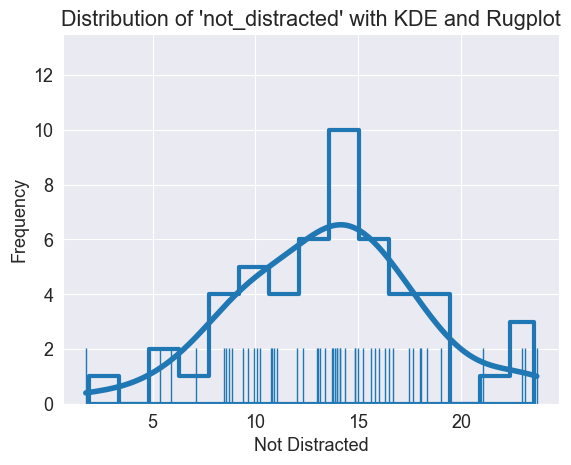

In [49]:
# let's make the plot look a little bit good

sns.histplot(
    data=car_df,
    x='not_distracted',
    bins=15,
    kde=True,
    element='step',    # You can remove this along with kw just to fill the bar
    alpha=0,
    shrink=0.8,
    line_kws={'linewidth': 4},  # Styling KDE line
    lw=3  # This still applies to the histogram line (optional)
)

sns.rugplot(data=car_df, x='not_distracted', height=0.15)

plt.title("Distribution of 'not_distracted' with KDE and Rugplot")

plt.xlabel("Not Distracted")
plt.ylabel("Frequency")

plt.show()

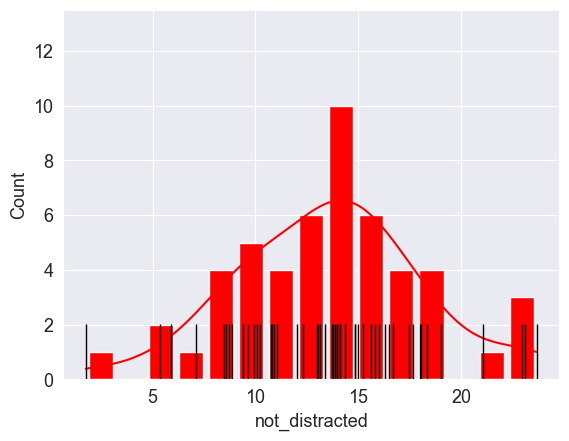

In [50]:
sns.histplot(data=car_df, x='not_distracted', bins=15, kde=True, element='bars', alpha=1, shrink=0.8, color='red'); # This will change the color of the bar
sns.rugplot(data=car_df, x='not_distracted', height=0.15, alpha=1, color='black')
plt.show()